In [1]:
# Download the data to SageMaker instance and load the data into a dataframe.    
    
import pandas as pd
import numpy as np

try:
  urllib.request.urlretrieve ("https://github.com/PacktPublishing/Python-for-Finance-Cookbook/raw/master/Datasets/credit_card_default.csv", "credit_card_default.csv")
  print('Success: downloaded credit_card_default.csv.')
except Exception as e:
  print('Data load error: ',e)

# load the data into a dataframe with null values as blanks
try:
  df = pd.read_csv('./credit_card_default.csv',index_col=0, na_values='')
  print('Success: Data loaded into dataframe.')
except Exception as e:
    print('Data load error: ',e)

ImportError: C extension: dlopen(/Users/tajalahluwalia/Library/Python/3.8/lib/python/site-packages/pandas/_libs/interval.cpython-38-darwin.so, 2): no suitable image found.  Did find:
	/Users/tajalahluwalia/Library/Python/3.8/lib/python/site-packages/pandas/_libs/interval.cpython-38-darwin.so: mach-o, but wrong architecture
	/Users/tajalahluwalia/Library/Python/3.8/lib/python/site-packages/pandas/_libs/interval.cpython-38-darwin.so: mach-o, but wrong architecture not built. If you want to import pandas from the source directory, you may need to run 'python setup.py build_ext --force' to build the C extensions first.

In [42]:
# Preview a CSV file

!head -n 5 credit_card_default.csv

,limit_bal,sex,education,marriage,age,payment_status_sep,payment_status_aug,payment_status_jul,payment_status_jun,payment_status_may,payment_status_apr,bill_statement_sep,bill_statement_aug,bill_statement_jul,bill_statement_jun,bill_statement_may,bill_statement_apr,previous_payment_sep,previous_payment_aug,previous_payment_jul,previous_payment_jun,previous_payment_may,previous_payment_apr,default_payment_next_month
0,20000,Female,University,Married,24,Payment delayed 2 months,Payment delayed 2 months,Payed duly,Payed duly,Unknown,Unknown,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,Female,University,Single,26,Payed duly,Payment delayed 2 months,Unknown,Unknown,Unknown,Payment delayed 2 months,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,Female,University,Single,34,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,Female,University,Married,37,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,46990

In [43]:
# check the dataframe
df.tail(2)

,limit_bal,sex,education,marriage,age,payment_status_sep,payment_status_aug,payment_status_jul,payment_status_jun,payment_status_may,...,bill_statement_jun,bill_statement_may,bill_statement_apr,previous_payment_sep,previous_payment_aug,previous_payment_jul,previous_payment_jun,previous_payment_may,previous_payment_apr,default_payment_next_month
29998,80000,Male,High school,Married,41.0,Payment delayed 1 month,Payed duly,Unknown,Unknown,Unknown,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,50000,Male,University,Married,46.0,Unknown,Unknown,Unknown,Unknown,Unknown,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [44]:
# get the number of records and columns/features
df.shape

(30000, 24)

In [45]:
# Separate the features from the target
X = df.copy()
y = X.pop('default_payment_next_month')

In [46]:
X.tail(2)

,limit_bal,sex,education,marriage,age,payment_status_sep,payment_status_aug,payment_status_jul,payment_status_jun,payment_status_may,...,bill_statement_jul,bill_statement_jun,bill_statement_may,bill_statement_apr,previous_payment_sep,previous_payment_aug,previous_payment_jul,previous_payment_jun,previous_payment_may,previous_payment_apr
29998,80000,Male,High school,Married,41.0,Payment delayed 1 month,Payed duly,Unknown,Unknown,Unknown,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804
29999,50000,Male,University,Married,46.0,Unknown,Unknown,Unknown,Unknown,Unknown,...,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000


In [47]:
y.tail(2)

29998    1
29999    1
Name: default_payment_next_month, dtype: int64

## description of the variables:
1. limit_bal: The amount of the given credit (NT dollar) 
1. sex: Gender
1. education: Level of education
1. marriage: Marital status
1. age: Age of the customer
1. payment_status_{month}: Status of payments in one of the previous 6 months
1. bill_statement_{month}: The amount of bill statements (NT dollars) in one of the previous 6 months
1. previous_payment_{month}: The amount of previous payments (NT dollars) in one of the previous 6 months

The target variable indicates whether the customer defaulted on the payment in the following month.

In [48]:
# inspect the datatypes of the variables

df.dtypes

limit_bal                       int64
sex                            object
education                      object
marriage                       object
age                           float64
payment_status_sep             object
payment_status_aug             object
payment_status_jul             object
payment_status_jun             object
payment_status_may             object
payment_status_apr             object
bill_statement_sep              int64
bill_statement_aug              int64
bill_statement_jul              int64
bill_statement_jun              int64
bill_statement_may              int64
bill_statement_apr              int64
previous_payment_sep            int64
previous_payment_aug            int64
previous_payment_jul            int64
previous_payment_jun            int64
previous_payment_may            int64
previous_payment_apr            int64
default_payment_next_month      int64
dtype: object

In [49]:
# define a function, which we use to inspect how much memory (in MBs) a DataFrame actually uses
def get_df_memory_usage(df, top_columns=5):
               print('Memory usage ----')
               memory_per_column = df.memory_usage(deep=True) / 1024 ** 2
               print(f'Top {top_columns} columns by memory (MB):')
               print(memory_per_column.sort_values(ascending=False) \
                                      .head(top_columns))
               print(f'Total size: {memory_per_column.sum():.4f} MB')

In [50]:
get_df_memory_usage(df)

Memory usage ----
Top 5 columns by memory (MB):
education             1.965001
payment_status_sep    1.954342
payment_status_aug    1.920288
payment_status_jul    1.916343
payment_status_jun    1.904229
dtype: float64
Total size: 20.7012 MB


In [51]:
# Create a copy of the original DataFrame and change the types of the object columns to category.

# select the names of the columns with variables of the object type (using the select_dtypes method), 
# and then convert them to a categorical type using the astype method.

df_cat = df.copy()
object_columns = df_cat.select_dtypes(include='object').columns
df_cat[object_columns] = df_cat[object_columns].astype('category')

In [52]:
# Examine the size of the new dataframe
get_df_memory_usage(df_cat)

Memory usage ----
Top 5 columns by memory (MB):
default_payment_next_month    0.228882
bill_statement_may            0.228882
limit_bal                     0.228882
age                           0.228882
previous_payment_apr          0.228882
dtype: float64
Total size: 3.9266 MB


##### this simple transformation managed to reduce the size of the DataFrame by ~80%

## Exploratory data analysis

1. What kind of data do we actually have, and how should we treat different types?
1. What is the distribution of the variables?
    1. Are there outliers in the data, and how can we treat them?
    1. Are any transformations required? For example, some models work better with (or require) normally distributed variables, so we might want to use techniques such as log transformation.
    1. Does the distribution vary per group (for example, gender or education level)?
1. Do we have cases of missing data? How frequent are these, and in which variables?
1. Is there a linear relationship between some variables (correlation)?
1. Can we create new features using the existing set of variables? An example might be deriving hour/minute from a timestamp, day of the week from a date, and so on.
1. Are there any variables that we can remove as they are not relevant for the analysis? An example might be a randomly generated customer identifier.

In [74]:
# 1 Import the libraries
import seaborn as sns

In [75]:
# 2 Get summary statistics for numerical variables

df.describe(percentiles=[.99]).T.round(2)

# we add percentile to exclude any outliers

,count,mean,std,min,50%,99%,max
limit_bal,30000.0,167484.32,129747.66,10000.0,140000.0,500000.00,1000000.0
age,29850.0,35.49,9.22,21.0,34.0,60.00,79.0
bill_statement_sep,30000.0,51223.33,73635.86,-165580.0,22381.5,350110.68,964511.0
bill_statement_aug,30000.0,49179.08,71173.77,-69777.0,21200.0,337495.28,983931.0
bill_statement_jul,30000.0,47013.15,69349.39,-157264.0,20088.5,325030.39,1664089.0
bill_statement_jun,30000.0,43262.95,64332.86,-170000.0,19052.0,304997.27,891586.0
bill_statement_may,30000.0,40311.40,60797.16,-81334.0,18104.5,285868.33,927171.0
bill_statement_apr,30000.0,38871.76,59554.11,-339603.0,17071.0,279505.06,961664.0
previous_payment_sep,30000.0,5663.58,16563.28,0.0,2100.0,66522.18,873552.0
previous_payment_aug,30000.0,5921.16,23040.87,0.0,2009.0,76651.02,1684259.0


In [67]:
# 3 Get summary statistics for categorical variables:

df.describe(include='object').T

,count,unique,top,freq
sex,29850,2,Female,18027
education,29850,4,University,13960
marriage,29850,3,Single,15891
payment_status_sep,30000,10,Unknown,17496
payment_status_aug,30000,10,Unknown,19512
payment_status_jul,30000,10,Unknown,19849
payment_status_jun,30000,10,Unknown,20803
payment_status_may,30000,9,Unknown,21493
payment_status_apr,30000,9,Unknown,21181


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


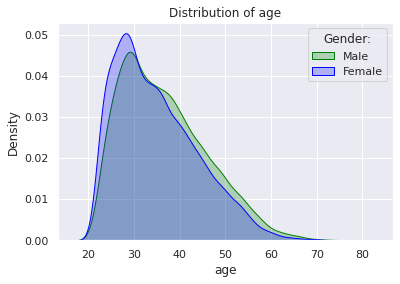

In [68]:
# 4 Plot the distribution of age and, additionally, split it by gender
fig, ax = plt.subplots()
sns.distplot(df.loc[df.sex=='Male', 'age'].dropna(),
          hist=False, color='green',
          kde_kws={"shade": True},
          ax=ax, label='Male')
sns.distplot(df.loc[df.sex=='Female', 'age'].dropna(),
          hist=False, color='blue',
          kde_kws={"shade": True},
          ax=ax, label='Female')
ax.set_title('Distribution of age')
ax.legend(title='Gender:')

##### The female sample is slightly younger, on average.

Text(0.5, 1.05, 'Pairplot of selected variables')

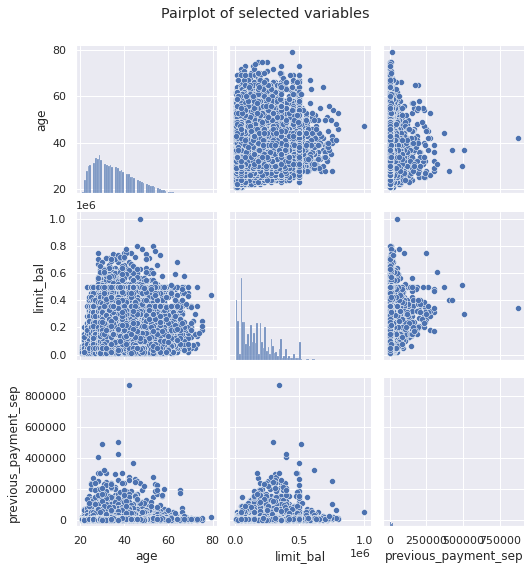

In [69]:
# 5 Plot a pairplot of selected variables
pair_plot = sns.pairplot(df[['age', 'limit_bal',
                            'previous_payment_sep']])
pair_plot.fig.suptitle('Pairplot of selected variables', y=1.05)

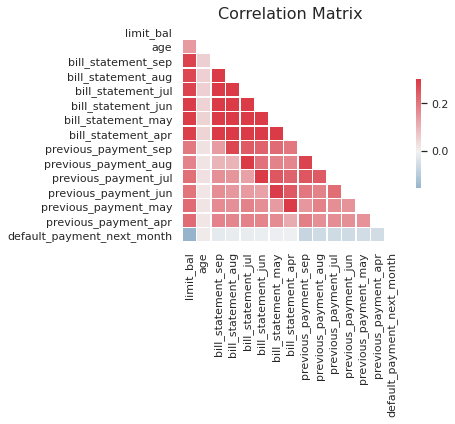

In [70]:
# 6 Define and run a function for plotting the correlation heatmap

def plot_correlation_matrix(corr_mat):
   sns.set(style="white")
   mask = np.zeros_like(corr_mat, dtype=np.bool)
   mask[np.triu_indices_from(mask)] = True
   fig, ax = plt.subplots()
   cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
   sns.heatmap(corr_mat, mask=mask, cmap=cmap, vmax=.3, center=0,
               square=True, linewidths=.5,
               cbar_kws={"shrink": .5}, ax=ax)
   ax.set_title('Correlation Matrix', fontsize=16)
   sns.set(style="darkgrid")

corr_mat = df.select_dtypes(include='number').corr()

plot_correlation_matrix(corr_mat)

##### age seems to be uncorrelated to any of the other features

Text(0.5, 1.0, 'Distribution of limit balance per education level')

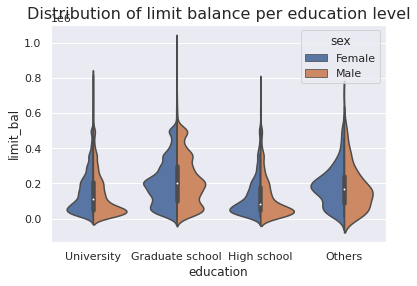

In [77]:
# 7 Plot the distribution of limit balance for each gender and education level by using violinplot
ax = sns.violinplot(x='education', y='limit_bal',
                   hue='sex', split=True, data=df)
ax.set_title('Distribution of limit balance per education level',
            fontsize=16)

#### Inspecting the plot reveals a few interesting patterns:
1. The largest balance appears in the group with the Graduate school level of education.
1. The shape of the distribution is different per education level: the Graduate school level resembles the Others category, while the High school level is similar to the University level.
1. In general, there are few differences between the genders.


#### In the violin plots, we can find the following information:
1. Median, represented by a white dot.
1. Interquartile range (IQR), represented as the black bar in the center of a violin.
1. The lower and upper adjacent values, represented by the black lines stretched from the bar. The lower adjacent value is defined as the first quartile − 1.5 IQR, while the upper is defined as the third quartile + 1.5 IQR.

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of the target variable')

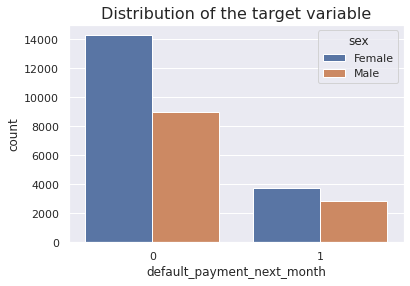

In [72]:
# 8 Investigate the distribution of the target variable per gender and education level
ax = sns.countplot('default_payment_next_month', hue='sex',
                  data=df, orient='h')
ax.set_title('Distribution of the target variable', fontsize=16)

##### the percentage of defaults is higher among male customers

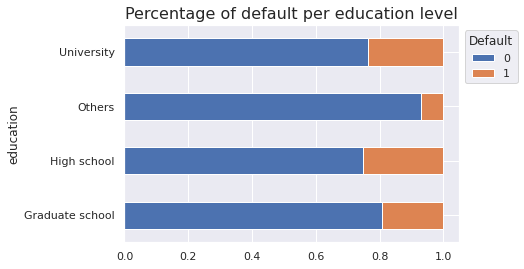

In [73]:
# 9 Investigate the percentage of defaults per education level:

ax = df.groupby("education")['default_payment_next_month'] \
    .value_counts(normalize=True) \
    .unstack() \
    .plot(kind='barh', stacked='True')
ax.set_title('Percentage of default per education level',
           fontsize=16)
ax.legend(title='Default', bbox_to_anchor=(1,1))

##### Least defaults happen in the Others category

## Splitting data into training and test sets

1. Training set—On this part of the data, we train a machine learning model
1. Test set—This part of the data was not seen by the model during training, and is
used to evaluate the performance

In [84]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, shuffle=True, stratify=y)

# Verify that the ratio of the target is preserved:
y_train.value_counts(normalize=True)
y_test.value_counts(normalize=True)

0    0.778833
1    0.221167
Name: default_payment_next_month, dtype: float64

## Dealing with missing values

1. Missing completely at random (MCAR)—The reason for the missing data is unrelated to the rest of the data. An example could be a respondent accidentally missing a question in a survey.
1. Missing at random (MAR)—The missingness of the data can be inferred from data in another column(-s). For example, the missingness to a response to a certain survey question can be to some extent determined conditionally by other factors such as gender, age, lifestyle, and so on.
1. Missing not at random (MNAR)—When there is some underlying reason for the missing values. For example, people with very high incomes tend to be hesitant about revealing it.
1. Structurally missing data—Often a subset of MNAR, the data is missing because of a logical reason. For example, when a variable representing the age of a spouse is missing, we can infer that a given person has no spouse.

In [87]:
# 1. import the libraries

!pip install missingno

import missingno
from sklearn.impute import SimpleImputer

In [88]:
# 2. Inspect the information about the DataFrame
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   limit_bal             30000 non-null  int64  
 1   sex                   29850 non-null  object 
 2   education             29850 non-null  object 
 3   marriage              29850 non-null  object 
 4   age                   29850 non-null  float64
 5   payment_status_sep    30000 non-null  object 
 6   payment_status_aug    30000 non-null  object 
 7   payment_status_jul    30000 non-null  object 
 8   payment_status_jun    30000 non-null  object 
 9   payment_status_may    30000 non-null  object 
 10  payment_status_apr    30000 non-null  object 
 11  bill_statement_sep    30000 non-null  int64  
 12  bill_statement_aug    30000 non-null  int64  
 13  bill_statement_jul    30000 non-null  int64  
 14  bill_statement_jun    30000 non-null  int64  
 15  bill_statement_may 

<AxesSubplot:>

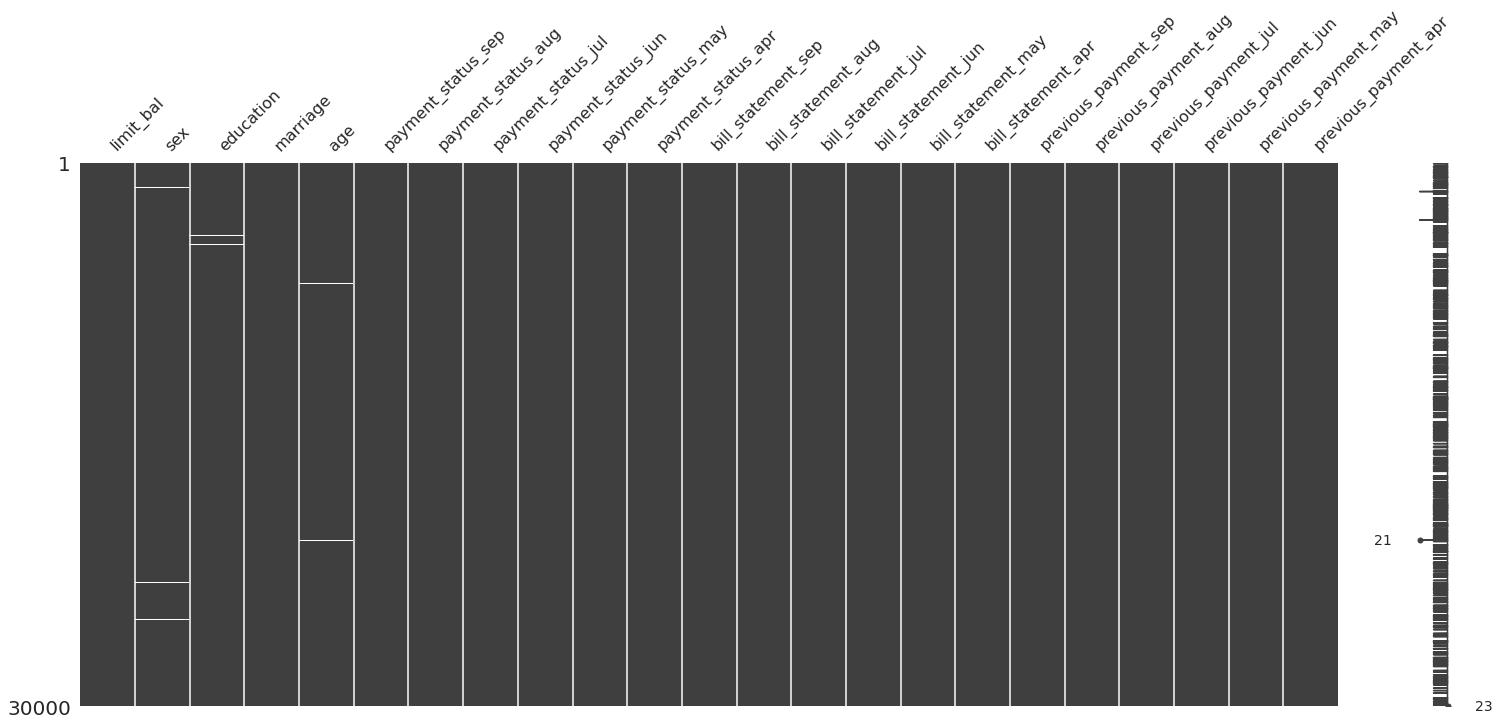

In [91]:
# 3. Visualize the nullity of the DataFrame
missingno.matrix(X)

In [92]:
# 4. Define columns with missing values per data type
NUM_FEATURES = ['age']
CAT_FEATURES = ['sex', 'education', 'marriage']

In [94]:
# 5. Impute numerical features
for col in NUM_FEATURES:
    num_imputer = SimpleImputer(strategy='median')
    num_imputer.fit(X_train[[col]])
    X_train.loc[:, col] = num_imputer.transform(X_train[[col]])
    X_test.loc[:, col] = num_imputer.transform(X_test[[col]])

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [95]:
# 6. Impute categorical features
for col in CAT_FEATURES:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    cat_imputer.fit(X_train[[col]])
    X_train.loc[:, col] = cat_imputer.transform(X_train[[col]])
    X_test.loc[:, col] = cat_imputer.transform(X_test[[col]])

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [96]:
# 7. Verify that there are no missing values
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24000 entries, 22788 to 27126
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   limit_bal             24000 non-null  int64  
 1   sex                   24000 non-null  object 
 2   education             24000 non-null  object 
 3   marriage              24000 non-null  object 
 4   age                   24000 non-null  float64
 5   payment_status_sep    24000 non-null  object 
 6   payment_status_aug    24000 non-null  object 
 7   payment_status_jul    24000 non-null  object 
 8   payment_status_jun    24000 non-null  object 
 9   payment_status_may    24000 non-null  object 
 10  payment_status_apr    24000 non-null  object 
 11  bill_statement_sep    24000 non-null  int64  
 12  bill_statement_aug    24000 non-null  int64  
 13  bill_statement_jul    24000 non-null  int64  
 14  bill_statement_jun    24000 non-null  int64  
 15  bill_statement_

## Encoding categorical variables

In [99]:
# 1. Import the libraries:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [100]:
# 2 Use Label Encoder to encode a selected column:
COL = 'education'
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()
label_enc = LabelEncoder()
label_enc.fit(X_train_copy[COL])
X_train_copy.loc[:, COL] = label_enc.transform(X_train_copy[COL])
X_test_copy.loc[:, COL] = label_enc.transform(X_test_copy[COL])

In [101]:
# 3. Select categorical features for one-hot encoding:
CAT_FEATURES = X_train.select_dtypes(include='object') \
                     .columns \
                    .to_list()

In [102]:
# 4. Instantiate the OneHotEncoder object:   
one_hot_encoder = OneHotEncoder(sparse=False,
                               handle_unknown='error',
                               drop='first')

In [103]:
# 5. Create the column transformer using the one-hot encoder:
one_hot_transformer = ColumnTransformer(
       [("one_hot", one_hot_encoder, CAT_FEATURES)])

In [104]:
# 6. Fit the transformer:
one_hot_transformer.fit(X_train)

ColumnTransformer(transformers=[('one_hot',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['sex', 'education', 'marriage',
                                  'payment_status_sep', 'payment_status_aug',
                                  'payment_status_jul', 'payment_status_jun',
                                  'payment_status_may',
                                  'payment_status_apr'])])

In [105]:
# 7. Apply the transformations to both the training and the test set:
col_names = one_hot_transformer.get_feature_names()
X_train_cat = pd.DataFrame(one_hot_transformer.transform(X_train),
                          columns=col_names,
                          index=X_train.index)
X_train_ohe = pd.concat([X_train, X_train_cat], axis=1) \
                .drop(CAT_FEATURES, axis=1)
X_test_cat = pd.DataFrame(one_hot_transformer.transform(X_test),
                          columns=col_names,
                          index=X_test.index)
X_test_ohe = pd.concat([X_test, X_test_cat], axis=1) \
                          .drop(CAT_FEATURES, axis=1)

### Using pandas.get_dummies for one-hot encoding

In [108]:
X_train = pd.get_dummies(X_train, prefix_sep='_', drop_first=True)

## Fitting a decision tree classifier

In [114]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

def performance_evaluation_report(model, X_test, y_test, show_plot=False, labels=None, show_pr_curve=False):
    '''
    Function for creating a performance report of a classification model.
    
    Parameters
    ----------
    model : scikit-learn estimator
        A fitted estimator for classification problems.
    X_test : pd.DataFrame
        DataFrame with features matching y_test
    y_test : array/pd.Series
        Target of a classification problem.
    show_plot : bool
        Flag whether to show the plot
    labels : list
        List with the class names.
    show_pr_curve : bool
        Flag whether to also show the PR-curve. For this to take effect, 
        show_plot must be True.
        
    Return
    ------
    stats : pd.Series
        A series with the most important evaluation metrics
    '''

    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    cm = metrics.confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_prob)
    roc_auc = metrics.auc(fpr, tpr)

    precision, recall, thresholds = metrics.precision_recall_curve(
        y_test, y_pred_prob)
    pr_auc = metrics.auc(recall, precision)

    if show_plot:

        if labels is None:
            labels = ['Negative', 'Positive']

        N_SUBPLOTS = 3 if show_pr_curve else 2
        PLOT_WIDTH = 15 if show_pr_curve else 12
        PLOT_HEIGHT = 5 if show_pr_curve else 6

        fig, ax = plt.subplots(
            1, N_SUBPLOTS, figsize=(PLOT_WIDTH, PLOT_HEIGHT))
        fig.suptitle('Performance Evaluation', fontsize=16)

        sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap='BuGn_r', square=True, cbar=False, ax=ax[0],
                    annot_kws={"ha": 'center', "va": 'center'})
        ax[0].set(xlabel='Predicted label',
                  ylabel='Actual label', title='Confusion Matrix')
        ax[0].xaxis.set_ticklabels(labels)
        ax[0].yaxis.set_ticklabels(labels)

        ax[1].plot(fpr, tpr, 'b-', label=f'ROC-AUC = {roc_auc:.2f}')
        ax[1].set(xlabel='False Positive Rate',
                  ylabel='True Positive Rate', title='ROC Curve')
        ax[1].plot(fp/(fp+tn), tp/(tp+fn), 'ro',
                   markersize=8, label='Decision Point')
        ax[1].plot([0, 1], [0, 1], 'r--')
        ax[1].legend(loc='lower right')

        if show_pr_curve:

            ax[2].plot(recall, precision, label=f'PR-AUC = {pr_auc:.2f}')
            ax[2].set(xlabel='Recall', ylabel='Precision',
                      title='Precision-Recall Curve')
            ax[2].legend()

#         print('#######################')
#         print('Evaluation metrics ####')
#         print('#######################')
#         print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred):.4f}')
#         print(f'Precision: {metrics.precision_score(y_test, y_pred):.4f}')
#         print(f'Recall (Sensitivity): {metrics.recall_score(y_test, y_pred):.4f}')
#         print(f'Specificity: {(tn / (tn + fp)):.4f}')
#         print(f'F1-Score: {metrics.f1_score(y_test, y_pred):.4f}')
#         print(f"Cohen's Kappa: {metrics.cohen_kappa_score(y_test, y_pred):.4f}")

    stats = {'accuracy': metrics.accuracy_score(y_test, y_pred),
             'precision': metrics.precision_score(y_test, y_pred),
             'recall': metrics.recall_score(y_test, y_pred),
             'specificity': (tn / (tn + fp)),
             'f1_score': metrics.f1_score(y_test, y_pred),
             'cohens_kappa': metrics.cohen_kappa_score(y_test, y_pred),
             'roc_auc': roc_auc,
             'pr_auc': pr_auc}

    return stats

In [115]:
# 1. Import the libraries:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from io import StringIO
import seaborn as sns
from ipywidgets import Image
!pip install pydotplus
import pydotplus

In [116]:
# 2. Create an instance of the model, fit it to the training data, and create the prediction:
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train_ohe, y_train)
y_pred = tree_classifier.predict(X_test_ohe)

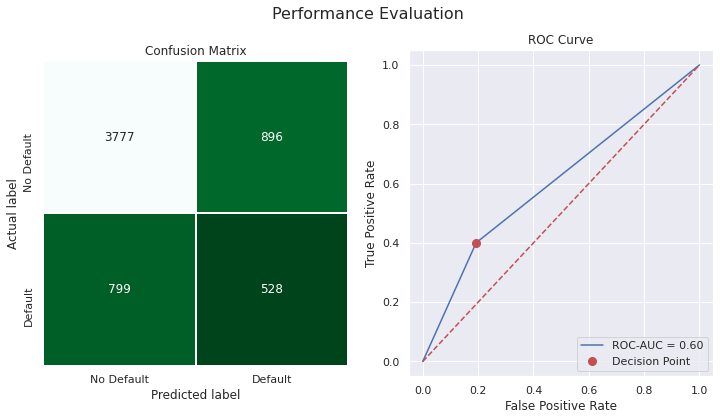

In [117]:
# 3. Evaluate the results:
LABELS = ['No Default', 'Default']
tree_perf = performance_evaluation_report(tree_classifier, X_test_ohe, 
                                          y_test, labels=LABELS, show_plot=True)

In [120]:
# 4. Plot the simplified decision tree:

# define the depth of the tree
max_depth = 3

small_tree = DecisionTreeClassifier(max_depth=max_depth)
small_tree.fit(X_train_ohe, y_train)
tree_dot = StringIO()
export_graphviz(small_tree, feature_names=X_train_ohe.columns,
                 class_names=LABELS, rounded=True,
                 out_file=tree_dot,
                 proportion=False, precision=2, filled=True)
tree_graph = pydotplus.graph_from_dot_data(tree_dot.getvalue())
Image(value=tree_graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x07w\x00\x00\x02A\x08\x02\x00\x00\x00\xda\xdc\xa8\xc…

## Implementing scikit-learn's pipelines

In [124]:
# 1. Import the libraries:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

In [125]:
# 2. Load the data, separate the target, and create the stratified train-test split:
df = pd.read_csv('credit_card_default.csv', index_col=0, na_values='')
X = df.copy()
y = X.pop('default_payment_next_month')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [126]:
# 3. Store lists of numerical/categorical features:
num_features = X_train.select_dtypes(include='number') \
              .columns \
              .to_list()
cat_features = X_train.select_dtypes(include='object') \
              .columns \
              .to_list()

In [127]:
# 4. Define the numerical Pipeline:
num_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='median'))])

In [129]:
# 5. Define the categorical Pipeline:
cat_list = [list(X_train[col].dropna().unique()) for col in
cat_features]
cat_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                               ('onehot', OneHotEncoder(categories=cat_list, 
                                                        sparse=False,handle_unknown='error', drop='first'))])

In [130]:
# 6. Define the column transformer object:
preprocessor = ColumnTransformer(transformers=[('numerical', num_pipeline, num_features),
                                               ('categorical', cat_pipeline, cat_features)],
                                 remainder='drop')

In [131]:
# 7. Create a joint Pipeline:
dec_tree = DecisionTreeClassifier(random_state=42)
tree_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', dec_tree)])

In [133]:
# 8. Fit the Pipeline to the data:
tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['limit_bal', 'age',
                                                   'bill_statement_sep',
                                                   'bill_statement_aug',
                                                   'bill_statement_jul',
                                                   'bill_statement_jun',
                                                   'bill_statement_may',
                                                   'bill_statement_apr',
                                                   'previous_payment_sep',
                                                   'previous_payment_aug',
                                                   'previous_pa

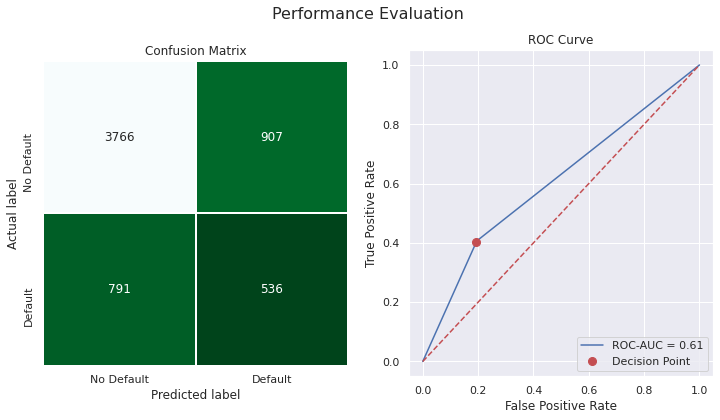

In [134]:
# 9. Evaluate the performance of the entire Pipeline:
LABELS = ['No Default', 'Default']
tree_perf = performance_evaluation_report(tree_pipeline, X_test,y_test, labels=LABELS, show_plot=True)

## Remove outliers


In [144]:
# how to create a custom transformer to detect and modify outliers.
from sklearn.base import BaseEstimator, TransformerMixin

In [145]:
class OutlierRemover(BaseEstimator, TransformerMixin):
                def __init__(self, n_std=3):
                    self.n_std = n_std
                def fit(self, X, y = None):
                    if np.isnan(X).any(axis=None):
                        raise ValueError('''There are missing values in the array! Please remove them.''')
                    mean_vec = np.mean(X, axis=0)
                    std_vec = np.std(X, axis=0)
                    self.upper_band_ = mean_vec + self.n_std * std_vec
                    self.lower_band_ = mean_vec - self.n_std * std_vec
                    self.n_features_ = len(self.upper_band_)
                    return self
                def transform(self, X, y = None):
                    X_copy = pd.DataFrame(X.copy())
                    upper_band = np.repeat(
                    self.upper_band_.reshape(self.n_features_, -1),
                    len(X_copy),
                    axis=1).transpose()
                    lower_band = np.repeat(
                        self.lower_band_.reshape(self.n_features_, -1),
                        len(X_copy),
                        axis=1).transpose()
                    X_copy[X_copy >= upper_band] = upper_band
                    X_copy[X_copy <= lower_band] = lower_band
                    return X_copy.values


In [146]:
# 3. Add the OutlierRemover to the numerical Pipeline:
num_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), 
                               ('outliers', OutlierRemover())])

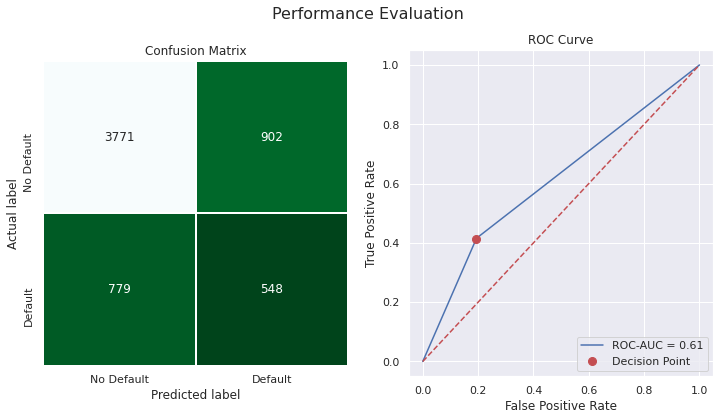

In [147]:
# 4. Run the rest of the Pipeline, to compare the results:
preprocessor = ColumnTransformer(transformers=[
   ('numerical', num_pipeline, num_features),
   ('categorical', cat_pipeline, cat_features)],
   remainder='drop')
dec_tree = DecisionTreeClassifier(random_state=42)
tree_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', dec_tree)])
tree_pipeline.fit(X_train, y_train)
tree_perf = performance_evaluation_report(tree_pipeline, X_test,
                                         y_test, labels=LABELS, show_plot=True)


## Tuning hyperparameters using grid searches and cross-validation

#### Hyperparameters:
1. External characteristic of the model Not estimated based on data
1. Can be considered the model's settings Set before the training phase
1. Tuning them can result in better performance 

#### Parameters:
1. Internal characteristic of the model
1. Estimated based on data, for example, the coefficients of linear regression 
1. Learned during the training phase

In [148]:
# 1. Import the libraries:
from sklearn.model_selection import (GridSearchCV, cross_val_score,
                                     RandomizedSearchCV, cross_validate, StratifiedKFold)

In [149]:
# 2. Define a cross-validation scheme:
k_fold = StratifiedKFold(5, shuffle=True, random_state=42)

In [150]:
# 3. Evaluate the Pipeline using cross-validation:
cross_val_score(tree_pipeline, X_train, y_train, cv=k_fold)


array([0.724375  , 0.724375  , 0.72354167, 0.72333333, 0.71625   ])

In [151]:
# 4. Add extra metrics to the cross-validation:
cross_validate(tree_pipeline, X_train, y_train, cv=k_fold, scoring=['accuracy', 'precision', 'recall', 'roc_auc'])

{'fit_time': array([0.64530706, 0.67322588, 0.67260146, 0.67047   , 0.65829444]),
 'score_time': array([0.07629347, 0.07621646, 0.07568979, 0.07611656, 0.07464361]),
 'test_accuracy': array([0.724375  , 0.724375  , 0.72354167, 0.72333333, 0.71625   ]),
 'test_precision': array([0.3864818 , 0.38931298, 0.37765466, 0.38018018, 0.37201365]),
 'test_recall': array([0.42035815, 0.43220339, 0.38512241, 0.39736347, 0.41054614]),
 'test_roc_auc': array([0.61588337, 0.62038712, 0.60254522, 0.60695746, 0.60674586])}

In [152]:
# 5. Define the parameter grid:
param_grid = {'classifier__criterion': ['entropy', 'gini'],
             'classifier__max_depth': range(3, 11),
             'classifier__min_samples_leaf': range(2, 11),
             'preprocessor__numerical__outliers__n_std': [3, 4]}

In [153]:
# 6. Run the grid search:
classifier_gs = GridSearchCV(tree_pipeline, param_grid,
                            scoring='recall',
                            cv=k_fold, n_jobs=-1, verbose=1)
classifier_gs.fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('outliers',
                                                                                          OutlierRemover())]),
                                                                         ['limit_bal',
                                                                          'age',
                                                                          'bill_statement_sep',
                                                                          'bill

In [154]:
print(f'Best parameters: {classifier_gs.best_params_}')
print(f'Recall (Training set): {classifier_gs.best_score_:.4f}')
print(f'Recall (Test set): {metrics.recall_score(y_test, classifier_gs.predict(X_test)):.4f}')

Best parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 9, 'classifier__min_samples_leaf': 2, 'preprocessor__numerical__outliers__n_std': 3}
Recall (Training set): 0.3537
Recall (Test set): 0.3602


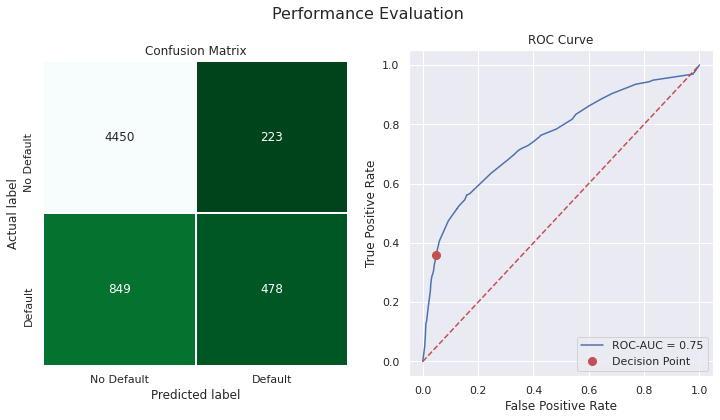

In [155]:
# 7. Evaluate the performance of the grid search:
LABELS = ['No Default', 'Default']
tree_gs_perf = performance_evaluation_report(classifier_gs, X_test,
                                            y_test, labels=LABELS,
                                            show_plot=True)

In [157]:
# 8. Run the randomized grid search:
classifier_rs = RandomizedSearchCV(tree_pipeline, param_grid,
                                  scoring='recall',
                                  cv=k_fold, n_jobs=-1, verbose=1,
                                  n_iter=100, random_state=42)
print(f'Best parameters: {classifier_rs.best_params_}')
print(f'Recall (Training set): {classifier_rs.best_score_:.4f}')
print(f'Recall (Test set): {metrics.recall_score(y_test, classifier_rs.predict(X_test)):.4f}')

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'